In [1]:
import pyspark
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.getOrCreate()

In [3]:
spark

In [5]:
df= spark.read.csv("C:\\Users\\HP\\Downloads\\Rossmann Sales\\train.csv",inferSchema=True,header=True)
df.show()

+-----+---------+----------+-----+---------+----+-----+------------+-------------+
|Store|DayOfWeek|      Date|Sales|Customers|Open|Promo|StateHoliday|SchoolHoliday|
+-----+---------+----------+-----+---------+----+-----+------------+-------------+
|    1|        5|2015-07-31| 5263|      555|   1|    1|           0|            1|
|    2|        5|2015-07-31| 6064|      625|   1|    1|           0|            1|
|    3|        5|2015-07-31| 8314|      821|   1|    1|           0|            1|
|    4|        5|2015-07-31|13995|     1498|   1|    1|           0|            1|
|    5|        5|2015-07-31| 4822|      559|   1|    1|           0|            1|
|    6|        5|2015-07-31| 5651|      589|   1|    1|           0|            1|
|    7|        5|2015-07-31|15344|     1414|   1|    1|           0|            1|
|    8|        5|2015-07-31| 8492|      833|   1|    1|           0|            1|
|    9|        5|2015-07-31| 8565|      687|   1|    1|           0|            1|
|   

In [6]:
df.printSchema()

root
 |-- Store: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Date: date (nullable = true)
 |-- Sales: integer (nullable = true)
 |-- Customers: integer (nullable = true)
 |-- Open: integer (nullable = true)
 |-- Promo: integer (nullable = true)
 |-- StateHoliday: string (nullable = true)
 |-- SchoolHoliday: integer (nullable = true)



In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import year, month, dayofmonth
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

Date to Year,Month and Date

In [8]:
df = df.withColumn("Date", df["Date"].cast("timestamp"))

# Extract year, month, and day as new columns from Date
df = df.withColumn("Year", year("Date"))
df = df.withColumn("Month", month("Date"))
df = df.withColumn("Day", dayofmonth("Date"))

df = df.select("Store", "DayOfWeek", "Year", "Month", "Day", "Sales", "Customers","Open","Promo","StateHoliday","SchoolHoliday")

print("Transformed DataFrame:")
df.show()


Transformed DataFrame:
+-----+---------+----+-----+---+-----+---------+----+-----+------------+-------------+
|Store|DayOfWeek|Year|Month|Day|Sales|Customers|Open|Promo|StateHoliday|SchoolHoliday|
+-----+---------+----+-----+---+-----+---------+----+-----+------------+-------------+
|    1|        5|2015|    7| 31| 5263|      555|   1|    1|           0|            1|
|    2|        5|2015|    7| 31| 6064|      625|   1|    1|           0|            1|
|    3|        5|2015|    7| 31| 8314|      821|   1|    1|           0|            1|
|    4|        5|2015|    7| 31|13995|     1498|   1|    1|           0|            1|
|    5|        5|2015|    7| 31| 4822|      559|   1|    1|           0|            1|
|    6|        5|2015|    7| 31| 5651|      589|   1|    1|           0|            1|
|    7|        5|2015|    7| 31|15344|     1414|   1|    1|           0|            1|
|    8|        5|2015|    7| 31| 8492|      833|   1|    1|           0|            1|
|    9|        5|201

String to Int conversion

In [9]:
from pyspark.sql.functions import col

# Assuming 'IsHoliday' column is already in boolean datatype
df = df.withColumn("StateHoliday", col("StateHoliday").cast("integer"))

# Show the transformed DataFrame
df.show()

+-----+---------+----+-----+---+-----+---------+----+-----+------------+-------------+
|Store|DayOfWeek|Year|Month|Day|Sales|Customers|Open|Promo|StateHoliday|SchoolHoliday|
+-----+---------+----+-----+---+-----+---------+----+-----+------------+-------------+
|    1|        5|2015|    7| 31| 5263|      555|   1|    1|           0|            1|
|    2|        5|2015|    7| 31| 6064|      625|   1|    1|           0|            1|
|    3|        5|2015|    7| 31| 8314|      821|   1|    1|           0|            1|
|    4|        5|2015|    7| 31|13995|     1498|   1|    1|           0|            1|
|    5|        5|2015|    7| 31| 4822|      559|   1|    1|           0|            1|
|    6|        5|2015|    7| 31| 5651|      589|   1|    1|           0|            1|
|    7|        5|2015|    7| 31|15344|     1414|   1|    1|           0|            1|
|    8|        5|2015|    7| 31| 8492|      833|   1|    1|           0|            1|
|    9|        5|2015|    7| 31| 8565|     

In [10]:
df=df.na.drop()

In [11]:
df.printSchema()

root
 |-- Store: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Sales: integer (nullable = true)
 |-- Customers: integer (nullable = true)
 |-- Open: integer (nullable = true)
 |-- Promo: integer (nullable = true)
 |-- StateHoliday: integer (nullable = true)
 |-- SchoolHoliday: integer (nullable = true)



In [12]:
print("Columns in df:",df.columns)

Columns in df: ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


Assembler

In [13]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

inputCols = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


assembler = VectorAssembler(inputCols=inputCols, outputCol="features")
df_assembled = assembler.transform(df)

df_assembled.show()


+-----+---------+----+-----+---+-----+---------+----+-----+------------+-------------+--------------------+
|Store|DayOfWeek|Year|Month|Day|Sales|Customers|Open|Promo|StateHoliday|SchoolHoliday|            features|
+-----+---------+----+-----+---+-----+---------+----+-----+------------+-------------+--------------------+
|    1|        5|2015|    7| 31| 5263|      555|   1|    1|           0|            1|[1.0,5.0,2015.0,7...|
|    2|        5|2015|    7| 31| 6064|      625|   1|    1|           0|            1|[2.0,5.0,2015.0,7...|
|    3|        5|2015|    7| 31| 8314|      821|   1|    1|           0|            1|[3.0,5.0,2015.0,7...|
|    4|        5|2015|    7| 31|13995|     1498|   1|    1|           0|            1|[4.0,5.0,2015.0,7...|
|    5|        5|2015|    7| 31| 4822|      559|   1|    1|           0|            1|[5.0,5.0,2015.0,7...|
|    6|        5|2015|    7| 31| 5651|      589|   1|    1|           0|            1|[6.0,5.0,2015.0,7...|
|    7|        5|2015|    7|

Train-Test split

In [26]:
# Split the dataset into training and testing sets
(train, test) = df_assembled.randomSplit([0.8, 0.2], seed=42)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator_rmse = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="rmse")

Multi Linear

In [31]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Assuming 'train' and 'test' are your training and testing DataFrames

# Create a Linear Regression model
mlr = LinearRegression(featuresCol="features", labelCol="Sales")

# Train the model
mlr_model = mlr.fit(train)

# Make predictions on the test set
predictions = mlr_model.transform(test)

# Evaluate using RMSE
evaluator_rmse = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="rmse")
rmse_mlr = evaluator_rmse.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on test data: {rmse_mlr}")

# Evaluate using MAE
evaluator_mae = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="mae")
mae_mlr = evaluator_mae.evaluate(predictions)
print(f"Mean Absolute Error (MAE) on test data: {mae_mlr}")

# Evaluate using MSE
evaluator_mse = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="mse")
mse_mlr = evaluator_mse.evaluate(predictions)
print(f"Mean Squared Error (MSE) on test data: {mse_mlr}")

# Evaluate using R-squared (R2)
evaluator_r2 = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="r2")
r2_mlr = evaluator_r2.evaluate(predictions)
print(f"R-squared (R2) on test data: {r2_mlr}")


Root Mean Squared Error (RMSE) on test data: 1489.3406266338388
Mean Absolute Error (MAE) on test data: 1000.7025310220354
Mean Squared Error (MSE) on test data: 2218135.502142076
R-squared (R2) on test data: 0.8438868271511973


Decision tree

In [32]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Create a Decision Tree Regressor model
dt = DecisionTreeRegressor(featuresCol="features", labelCol="Sales")

# Train the model
dt_model = dt.fit(train)

# Make predictions on the test set
dt_predictions = dt_model.transform(test)

# Evaluate using RMSE
evaluator_rmse_dt = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="rmse")
rmse_dt = evaluator_rmse_dt.evaluate(dt_predictions)
print(f"Root Mean Squared Error (RMSE) on test data: {rmse_dt}")

# Evaluate using MAE
evaluator_mae_dt = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="mae")
mae_dt = evaluator_mae_dt.evaluate(dt_predictions)
print(f"Mean Absolute Error (MAE) on test data: {mae_dt}")

# Evaluate using MSE
evaluator_mse_dt = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="mse")
mse_dt = evaluator_mse_dt.evaluate(dt_predictions)
print(f"Mean Squared Error (MSE) on test data: {mse_dt}")

# Evaluate using R-squared (R2)
evaluator_r2_dt = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="r2")
r2_dt = evaluator_r2_dt.evaluate(dt_predictions)
print(f"R-squared (R2) on test data: {r2_dt}")


Root Mean Squared Error (RMSE) on test data: 1503.2473456469463
Mean Absolute Error (MAE) on test data: 988.5375810592664
Mean Squared Error (MSE) on test data: 2259752.5821945895
R-squared (R2) on test data: 0.8409578021184947


Gradient Booster

In [35]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Step 1: Create a Gradient Boosted Tree Regression model
gbt = GBTRegressor(featuresCol="features", labelCol="Sales", maxIter=100,maxBins=2000)

# Step 2: Fit the model to the training data
gbt_model = gbt.fit(train)

# Step 3: Make predictions on the test data
gbt_predictions = gbt_model.transform(test)

# Step 4: Evaluate the model
evaluator = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="rmse")
rmse_gbt = evaluator.evaluate(gbt_predictions)
print(f"Root Mean Squared Error (RMSE) on test data: {rmse_gbt}")

# Optionally, inspect the gradient boosted tree model
print(f"GBT Model: {gbt_model}")

evaluator_r2 = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="r2")
r2_gbt = evaluator_r2.evaluate(gbt_predictions)

print('r2',r2_gbt)

Root Mean Squared Error (RMSE) on test data: 988.1540771930456
GBT Model: GBTRegressionModel: uid=GBTRegressor_a26ae8bf9560, numTrees=100, numFeatures=10
r2 0.9312772054585315


In [38]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator

gbt = GBTRegressor(featuresCol="features", labelCol="Sales", maxIter=100,maxBins=2000)
gbt_model = gbt.fit(train)


gbt_predictions = gbt_model.transform(test)

# rmse
evaluator = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="rmse")
rmse_gbt = evaluator.evaluate(gbt_predictions)
print(f"Root Mean Squared Error (RMSE) on test data: {rmse_gbt}")


# r2
evaluator_r2 = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="r2")
r2_gbt = evaluator_r2.evaluate(gbt_predictions)
print('r2',r2_gbt)

#mse
evaluator_mse=RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="mse")
mse_gbt=evaluator_mse.evaluate(gbt_predictions)
print('mse',mse_gbt)

#mae
evaluator_mae=RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="mae")
mae_gbt=evaluator_mae.evaluate(gbt_predictions)
print('mae',mae_gbt)

Root Mean Squared Error (RMSE) on test data: 988.1540771930456
r2 0.9312772054585315
mse 976448.4802732397
mae 704.3416421454701


Random Forest

In [33]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Create a Random Forest Regressor model
rf = RandomForestRegressor(featuresCol="features", labelCol="Sales")

# Train the model
rf_model = rf.fit(train)

# Make predictions on the test set
rf_predictions = rf_model.transform(test)

# Evaluate using RMSE
evaluator_rmse_rf = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="rmse")
rmse_rf = evaluator_rmse_rf.evaluate(rf_predictions)
print(f"Root Mean Squared Error (RMSE) on test data: {rmse_rf}")

# Evaluate using MAE
evaluator_mae_rf = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="mae")
mae_rf = evaluator_mae_rf.evaluate(rf_predictions)
print(f"Mean Absolute Error (MAE) on test data: {mae_rf}")

# Evaluate using MSE
evaluator_mse_rf = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="mse")
mse_rf = evaluator_mse_rf.evaluate(rf_predictions)
print(f"Mean Squared Error (MSE) on test data: {mse_rf}")

# Evaluate using R-squared (R2)
evaluator_r2_rf = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="r2")
r2_rf = evaluator_r2_rf.evaluate(rf_predictions)
print(f"R-squared (R2) on test data: {r2_rf}")


Root Mean Squared Error (RMSE) on test data: 1517.95268802648
Mean Absolute Error (MAE) on test data: 1002.1699861597693
Mean Squared Error (MSE) on test data: 2304180.363086816
R-squared (R2) on test data: 0.8378309589517816


Isotonic


In [37]:
from pyspark.ml.regression import IsotonicRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Create an Isotonic Regressor model
iso = IsotonicRegression(featuresCol="features", labelCol="Sales")

# Train the model
iso_model = iso.fit(train)

# Make predictions on the test set
iso_predictions = iso_model.transform(test)

# Evaluate using RMSE
evaluator_rmse_iso = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="rmse")
rmse_iso = evaluator_rmse_iso.evaluate(iso_predictions)
print(f"Root Mean Squared Error (RMSE) on test data: {rmse_iso}")

# Evaluate using MAE
evaluator_mae_iso = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="mae")
mae_iso = evaluator_mae_iso.evaluate(iso_predictions)
print(f"Mean Absolute Error (MAE) on test data: {mae_iso}")

# Evaluate using MSE
evaluator_mse_iso = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="mse")
mse_iso = evaluator_mse_iso.evaluate(iso_predictions)
print(f"Mean Squared Error (MSE) on test data: {mse_iso}")

# Evaluate using R-squared (R2)
evaluator_r2_iso = RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="r2")
r2_iso = evaluator_r2_iso.evaluate(iso_predictions)
print(f"R-squared (R2) on test data: {r2_iso}")


Root Mean Squared Error (RMSE) on test data: 3757.9192498499856
Mean Absolute Error (MAE) on test data: 2794.343119233413
Mean Squared Error (MSE) on test data: 14121957.08839308
R-squared (R2) on test data: 0.00609159098952472


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

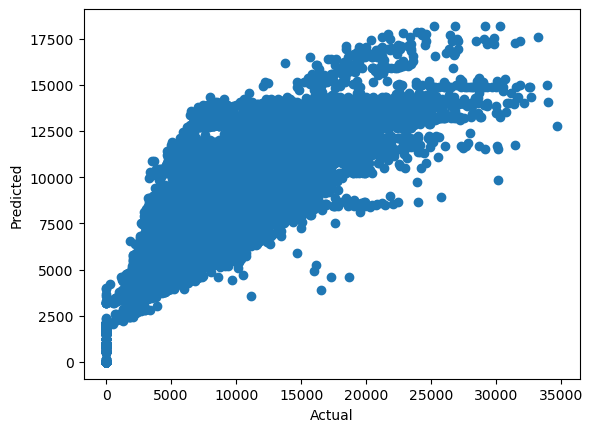

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

# Assuming "Sales" is your target variable
actual_values = test.select("Sales").collect()

plt.scatter([float(val.Sales) for val in actual_values], predictions_rf.select("prediction").collect())
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [42]:
r2_values = []
r2_values.append(r2_mlr)
r2_values.append(r2_dt)
r2_values.append(r2_gbt)
r2_values.append(r2_rf)
r2_values.append(r2_iso)
r2_values

[0.8438868271511973,
 0.8011843673647303,
 0.9312772054585315,
 0.8249719046547309,
 0.00609159098952472]

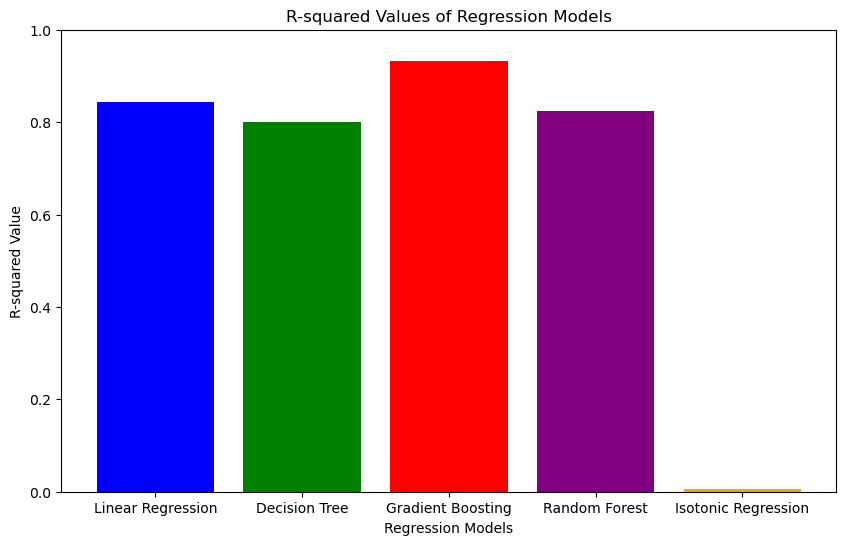

In [44]:
model_names = ['Linear Regression', 'Decision Tree','Gradient Boosting','Random Forest', 'Isotonic Regression']
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Regression Models')
plt.ylabel('R-squared Value')
plt.title('R-squared Values of Regression Models')
plt.ylim(0, 1)  
plt.show()